# Do logistic regression on Snippet dataset

In [1]:
# Load packages
import numpy as np
from matplotlib import pyplot as plt
from sklearn import decomposition as dc
from sklearn import linear_model as lm

/scratch/vs488/home/anaconda3/envs/aihack/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/scratch/vs488/home/anaconda3/envs/aihack/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
# Load data
snippets = np.load('../../data/snippets.npy')
targets = np.load('../../data/targets.npy')

# Remove time
snippets = snippets[:, :, :-1]

In [28]:
y = targets
ind_anomaly = np.where(y == 1)[0]
X = snippets.reshape(snippets.shape[0], np.prod(snippets.shape[1:]))
X_mean = np.mean(X, 1, keepdims=True)
X_std = np.std(X, 1, keepdims=True)
X_norm = (X - X_mean) / X_std

In [35]:
# Fit logistic regression model
for i in range(9):
    X_fold = np.delete(X_norm, ind_anomaly[i], 0)
    y_fold = np.delete(y, ind_anomaly[i], 0)
    log_reg = lm.LogisticRegression(max_iter=10000, class_weight='balanced')
    log_reg.fit(X_fold, y_fold)
    print(log_reg.predict(X_norm[ind_anomaly[i], :][None, :]))

[0]
[0]
[1]
[0]
[0]
[0]
[0]
[1]
[0]


In [43]:
# Do PCA
pca = dc.PCA(n_components=10)
pca.fit(X_norm)
X_trans = pca.transform(X_norm)

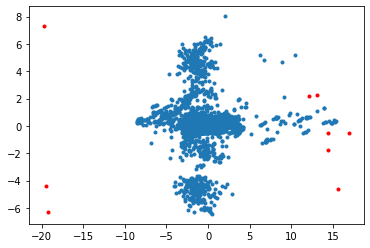

In [46]:
plt.plot(X_trans[:, 5], X_trans[:, 6], '.')
plt.plot(X_trans[ind_anomaly, 0], X_trans[ind_anomaly, 1], 'r.')